In [ ]:
"""
  Author : Mann Desai
  Topic : Applying PCA on Handwritten Digits(MNIST)
"""

In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
! cp /content/drive/MyDrive/KaggleAPI/kaggle.json ~/.kaggle

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle competitions download -c digit-recognizer

 59% 9.00M/15.3M [00:00<00:00, 76.0MB/s]
100% 15.3M/15.3M [00:00<00:00, 105MB/s] 


In [10]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [11]:
import numpy as np
import pandas as pd


In [61]:
df = pd.read_csv('/content/train.csv')

In [62]:
df.shape

(42000, 785)

In [63]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29736,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


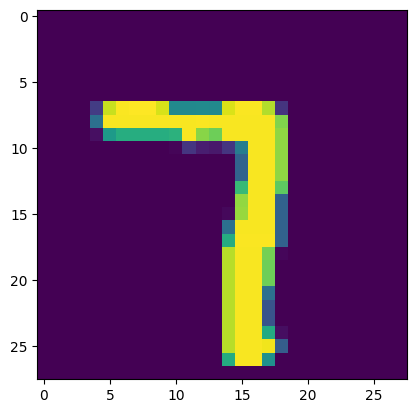

In [64]:
import matplotlib.pyplot as plt

plt.imshow(df.iloc[21583, 1:].values.reshape(28, 28))

In [65]:
X = df.iloc[:, 1:]
y =  df.iloc[:, 0]

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)

(33600, 784)
(33600,)


In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [68]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
import time
start = time.time()
y_pred = knn.predict(X_test) #This will take lot of time !!!!
print(time.time() - start)

24.41966438293457


In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

In [80]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
#Using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=200) #We'll create 200 out of 784 number of Principle components
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


In [87]:
X_train_trf.shape

(33600, 200)

In [88]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train_trf, y_train)


KNeighborsClassifier()

In [89]:
y_pred = knn1.predict(X_test_trf)
accuracy_score(y_test, y_pred)

0.9515476190476191

In [94]:
# How to get best Accuracy Means how do we know what is optimal number of PCA's possible ?
for i in range (1, 785):
  pca = PCA(n_components=i)
  X_train_trf = pca.fit_transform(X_train)
  X_test_trf = pca.transform(X_test)
  knn2 = KNeighborsClassifier()
  knn2.fit(X_train_trf, y_train)
  y_pred = knn2.predict(X_test_trf)
  print(accuracy_score(y_test, y_pred))


0.2617857142857143
0.32535714285714284
0.51
0.6633333333333333
0.7389285714285714
0.8232142857142857
0.8441666666666666
0.8721428571428571
0.8852380952380953
0.9055952380952381
0.9130952380952381
0.9166666666666666
0.9270238095238095
0.9336904761904762
0.935952380952381
0.9363095238095238
0.9394047619047619
0.940952380952381
0.9425
0.9444047619047619
0.9439285714285715
0.9447619047619048
0.9451190476190476
0.9457142857142857
0.9480952380952381
0.9473809523809524
0.9475
0.9476190476190476
0.9495238095238095
0.9495238095238095
0.9501190476190476
0.9515476190476191
0.9489285714285715
0.9492857142857143
0.9496428571428571
0.950952380952381
0.9514285714285714
0.9523809523809523
0.9546428571428571
0.9526190476190476
0.9525
0.9542857142857143
0.9525
0.9542857142857143
0.9542857142857143
0.9534523809523809
0.9539285714285715
0.9547619047619048
0.9534523809523809
0.9548809523809524
0.9545238095238096
0.9546428571428571
0.955
0.9542857142857143
0.9557142857142857
0.9546428571428571
0.95488095238

KeyboardInterrupt: 

In [95]:
# Transforming to a 2D Coordinate system :
pca = PCA(n_components = 2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
X_train_trf




array([[-2.71865011, -0.49006404],
       [-0.67706034, -6.75297781],
       [-3.03321616,  6.50967594],
       ...,
       [ 2.14881698,  0.78124828],
       [ 1.05959645,  0.94722425],
       [17.70262616,  1.9616646 ]])

In [99]:
import plotly.express as px
y_train_trf = y_train.astype(str)
print(y_train_trf.shape)

fig = px.scatter(x=X_train_trf[:, 0], y=X_train_trf[:, 1], color=y_train_trf, color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

(33600,)


In [103]:
# Transforming into 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

X_train_trf

array([[-226.6049559 ,  305.89471118,  417.18151902],
       [  38.33439701, -461.08902252,  100.4185167 ],
       [-305.49294254, -351.67069833, -961.34499692],
       ...,
       [ -28.00244466,  596.06324457,  606.24553219],
       [ 233.9713742 ,   18.65920919, -148.25305232],
       [1096.50349646, -254.70683953, -560.29813373]])

In [104]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:, 0], y=X_train_trf[:, 1], z=X_train_trf[:, 2], color=y_train_trf)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()



In [105]:
pca.explained_variance_
# Eigen Values

array([335506.57620452, 244807.10505882, 212051.03430385])

In [108]:
pca.components_
# Eigen Vectors

array([[ 9.53940722e-18, -2.08944893e-18,  5.44522733e-21, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-6.26669478e-17,  5.09812867e-17,  3.39112659e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-2.06596156e-17,  7.29231001e-17, -7.19247725e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [107]:
pca.components_.shape

(3, 784)

In [109]:
# How to find Optimum number of Principle components :
# we need to find out one Eigen Vector is explaining how much Variance ? of original data?
# For that we need to calculate percentage (lambda1 / (lambda1, ... ,lambda784)) * 100
# Generally we wanted to complete 90% of variance so we'll add all components till we get added percentage ofevery eigen vector as 90% those many number of priciple components are considered as optimal.

pca.explained_variance_ratio_

#The above three values show that first PCA1 will explain only 9.7% of variance of original data similarly for rest two.


array([0.09770722, 0.07129345, 0.06175413])

In [110]:
# Consider 784 Principle Components then...
pca = PCA(n_components=None) # 784 components since None
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)




In [111]:
pca.explained_variance_

array([3.35506576e+05, 2.44807105e+05, 2.12051035e+05, 1.85066153e+05,
       1.68000246e+05, 1.48918349e+05, 1.12510833e+05, 9.93294844e+04,
       9.51402644e+04, 7.99789771e+04, 7.18729893e+04, 7.02954186e+04,
       5.86421706e+04, 5.77978479e+04, 5.44160811e+04, 5.10942763e+04,
       4.54324809e+04, 4.40877557e+04, 4.06349678e+04, 3.95293850e+04,
       3.69465718e+04, 3.51694514e+04, 3.31919492e+04, 3.14980784e+04,
       3.03792806e+04, 2.86216441e+04, 2.79878549e+04, 2.66233147e+04,
       2.54782977e+04, 2.38073682e+04, 2.26921743e+04, 2.17431167e+04,
       2.07130988e+04, 2.02157853e+04, 1.92920932e+04, 1.85377184e+04,
       1.74405813e+04, 1.67269421e+04, 1.61818599e+04, 1.59519157e+04,
       1.55375765e+04, 1.52480605e+04, 1.43023838e+04, 1.35853438e+04,
       1.31721648e+04, 1.28124366e+04, 1.23858612e+04, 1.19793099e+04,
       1.14757321e+04, 1.09198370e+04, 1.07891523e+04, 1.05497976e+04,
       1.00392867e+04, 9.83967219e+03, 9.58435154e+03, 9.24819162e+03,
      

In [112]:
pca.components_.shape

(784, 784)

In [113]:
pca.explained_variance_ratio_

array([9.77072202e-02, 7.12934512e-02, 6.17541312e-02, 5.38955140e-02,
       4.89255299e-02, 4.33684433e-02, 3.27657386e-02, 2.89270270e-02,
       2.77070300e-02, 2.32917149e-02, 2.09310651e-02, 2.04716403e-02,
       1.70779469e-02, 1.68320607e-02, 1.58472125e-02, 1.48798267e-02,
       1.32309818e-02, 1.28393670e-02, 1.18338358e-02, 1.15118647e-02,
       1.07596902e-02, 1.02421519e-02, 9.66625789e-03, 9.17296381e-03,
       8.84714420e-03, 8.33528008e-03, 8.15070612e-03, 7.75332066e-03,
       7.41986542e-03, 6.93325236e-03, 6.60848230e-03, 6.33209492e-03,
       6.03213006e-03, 5.88730096e-03, 5.61830060e-03, 5.39860932e-03,
       5.07909781e-03, 4.87126968e-03, 4.71252924e-03, 4.64556419e-03,
       4.52489910e-03, 4.44058540e-03, 4.16518263e-03, 3.95636411e-03,
       3.83603691e-03, 3.73127577e-03, 3.60704723e-03, 3.48865016e-03,
       3.34199674e-03, 3.18010732e-03, 3.14204894e-03, 3.07234334e-03,
       2.92367086e-03, 2.86553852e-03, 2.79118328e-03, 2.69328579e-03,
      

In [114]:
# Now we need to reach 90% Variance value so applying cummelative sum upto 90%

np.cumsum(pca.explained_variance_ratio_)


array([0.09770722, 0.16900067, 0.2307548 , 0.28465032, 0.33357585,
       0.37694429, 0.40971003, 0.43863706, 0.46634409, 0.4896358 ,
       0.51056687, 0.53103851, 0.54811645, 0.56494851, 0.58079573,
       0.59567555, 0.60890653, 0.6217459 , 0.63357974, 0.6450916 ,
       0.65585129, 0.66609344, 0.6757597 , 0.68493267, 0.69377981,
       0.70211509, 0.7102658 , 0.71801912, 0.72543898, 0.73237223,
       0.73898072, 0.74531281, 0.75134494, 0.75723224, 0.76285054,
       0.76824915, 0.77332825, 0.77819952, 0.78291205, 0.78755761,
       0.79208251, 0.7965231 , 0.80068828, 0.80464464, 0.80848068,
       0.81221196, 0.815819  , 0.81930765, 0.82264965, 0.82582976,
       0.82897181, 0.83204415, 0.83496782, 0.83783336, 0.84062454,
       0.84331783, 0.84596712, 0.84853351, 0.85106204, 0.85351457,
       0.85592008, 0.85831105, 0.86057999, 0.86279635, 0.8649424 ,
       0.86700054, 0.86901774, 0.87098082, 0.87291702, 0.87479944,
       0.87665559, 0.87847316, 0.88022525, 0.88195105, 0.88360

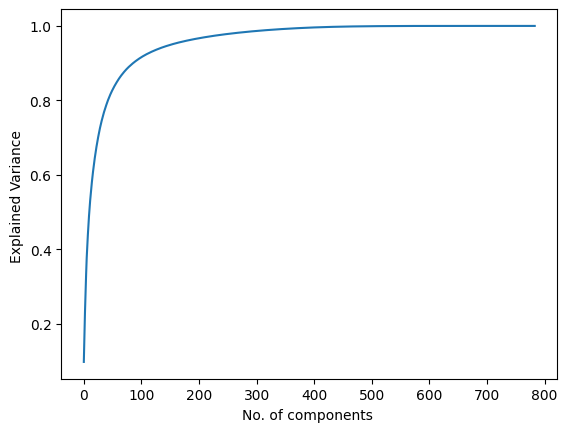

In [116]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No. of components ")
plt.ylabel("Explained Variance ")
plt.show()

Number of components needed for 0.9 explained variance: 87


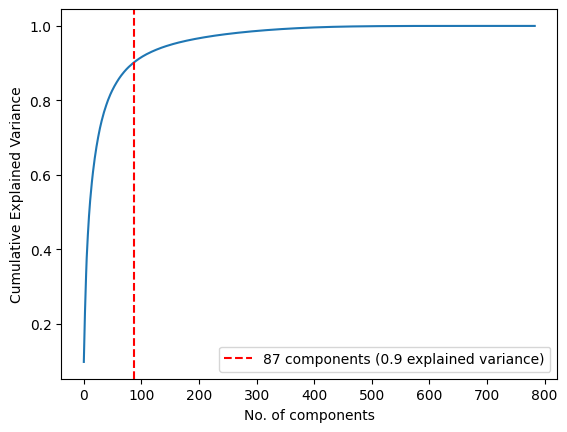

In [117]:

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
components_needed = np.argmax(cumulative_variance_ratio >= 0.9) + 1

print("Number of components needed for 0.9 explained variance:", components_needed)

plt.plot(cumulative_variance_ratio)
plt.xlabel("No. of components")
plt.ylabel("Cumulative Explained Variance")
plt.axvline(x=components_needed, color='r', linestyle='--', label=f'{components_needed} components (0.9 explained variance)')
plt.legend()
plt.show()

In [123]:
# Here i am getting 87 as optimal number of components so try with n_components=87 and get accuracy score

pca = PCA(n_components=87)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
knn3 = KNeighborsClassifier()
knn3.fit(X_train_trf, y_train)
y_pred = knn3.predict(X_test_trf)
print(accuracy_score(y_test, y_pred))
print(y_pred.shape)



0.97
(8400,)


In [124]:
print(X_test_trf.shape)
test = pd.read_csv('/content/train.csv')

submission = pd.DataFrame({'ImageId': range(1, len(y_pred) + 1), 'Label': y_pred})
submission.to_csv('submission.csv', index=False)



(8400, 87)
